This contains data from [Kaggle](https://www.kaggle.com/datasets/jockeroika/life-style-data/data). Refer to the link for more details on the data.

In [52]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [53]:
# setting the theme
sns.set_theme()

In [54]:
final_data_path = "../../kaggle_datasets/02_life_habits/Final_data.csv"

In [55]:
df = pd.read_csv(final_data_path)

In [56]:
# How big is the data
df.shape

(20000, 54)

In [57]:
# How does the data look like
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


In [58]:
# What are the columns
np.array(df.columns)

array(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins',
       'Fats', 'Calories', 'meal_name', 'meal_type', 'diet_type',
       'sugar_g', 'sodium_mg', 'cholesterol_mg', 'serving_size_g',
       'cooking_method', 'prep_time_min', 'cook_time_min', 'rating',
       'Name of Exercise', 'Sets', 'Reps', 'Benefit',
       'Burns Calories (per 30 min)', 'Target Muscle Group',
       'Equipment Needed', 'Difficulty Level', 'Body Part',
       'Type of Muscle', 'Workout', 'BMI_calc', 'cal_from_macros',
       'pct_carbs', 'protein_per_kg', 'pct_HRR', 'pct_maxHR',
       'cal_balance', 'lean_mass_kg', 'expected_burn',
       'Burns Calories (per 30 min)_bc', 'Burns_Calories_Bin'],
      dtype=object)

In [59]:
# Data type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  float64
 1   Gender                          20000 non-null  object 
 2   Weight (kg)                     20000 non-null  float64
 3   Height (m)                      20000 non-null  float64
 4   Max_BPM                         20000 non-null  float64
 5   Avg_BPM                         20000 non-null  float64
 6   Resting_BPM                     20000 non-null  float64
 7   Session_Duration (hours)        20000 non-null  float64
 8   Calories_Burned                 20000 non-null  float64
 9   Workout_Type                    20000 non-null  object 
 10  Fat_Percentage                  20000 non-null  float64
 11  Water_Intake (liters)           20000 non-null  float64
 12  Workout_Frequency (days/week)   

In [60]:
# How does the data look numerically
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),...,BMI_calc,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04
mean,38.851454,73.898832,1.723094,179.889702,143.704306,62.195813,1.259446,1280.109601,26.101313,2.627486,...,24.921651,1998.297076,0.499983,1.460142,0.699005,0.802305,744.308699,53.786384,866.352318,8.631802e+19
std,12.114580,21.173010,0.127033,11.510805,14.267688,7.289351,0.341336,502.228982,4.996160,0.604724,...,6.701144,440.848408,0.001455,0.518946,0.144880,0.096613,720.946619,12.498740,250.317069,3.197579e+19
min,18.000000,39.180000,1.490000,159.310000,119.070000,49.490000,0.490000,323.110000,11.333134,1.460000,...,12.037907,1105.570000,0.492434,0.516706,0.371344,0.599789,-1266.220000,30.946261,219.852800,2.491905e+16
25%,28.170000,58.160000,1.620000,170.057500,131.220000,55.960000,1.050000,910.800000,22.387807,2.170000,...,20.094975,1661.022500,0.499054,1.076294,0.583656,0.727676,261.432500,44.587037,714.098250,6.441978e+19
50%,39.865000,70.000000,1.710000,180.140000,142.990000,62.200000,1.270000,1231.450000,25.822504,2.610000,...,24.119097,1943.130000,0.499981,1.382260,0.686284,0.794834,691.190000,51.204908,868.721400,8.371578e+19
75%,49.630000,86.100000,1.800000,189.425000,156.060000,68.090000,1.460000,1553.112500,29.676026,3.120000,...,28.562620,2271.950000,0.500910,1.750495,0.798196,0.869211,1176.290000,61.939016,1012.532700,1.100442e+20
max,59.670000,130.770000,2.010000,199.640000,169.840000,74.500000,2.020000,2890.820000,35.000000,3.730000,...,50.229544,3699.540000,0.507889,3.916881,1.073939,1.047032,3075.580000,90.117371,1477.108800,1.756614e+20


In [61]:
# Checking for duplicates
df.duplicated().sum()

np.int64(0)

In [62]:
# Checking for null values
df.isnull().sum()

Age                               0
Gender                            0
Weight (kg)                       0
Height (m)                        0
Max_BPM                           0
Avg_BPM                           0
Resting_BPM                       0
Session_Duration (hours)          0
Calories_Burned                   0
Workout_Type                      0
Fat_Percentage                    0
Water_Intake (liters)             0
Workout_Frequency (days/week)     0
Experience_Level                  0
BMI                               0
Daily meals frequency             0
Physical exercise                 0
Carbs                             0
Proteins                          0
Fats                              0
Calories                          0
meal_name                         0
meal_type                         0
diet_type                         0
sugar_g                           0
sodium_mg                         0
cholesterol_mg                    0
serving_size_g              

In [63]:
# Selecting only the numerical data
numeric_df = df.select_dtypes(include=[np.number])

In [64]:
# Checking correlation
numeric_df.corr()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),...,BMI_calc,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc
Age,1.000000,-0.044077,-0.037096,-0.028763,0.039280,0.013387,-0.025410,-0.021396,-0.025056,0.037569,...,-0.016938,0.052045,-0.005022,0.067281,0.044258,0.048140,-0.015984,-0.050547,-0.025910,-0.020948
Weight (kg),-0.044077,1.000000,0.353763,0.066898,0.016761,-0.033578,-0.002275,-0.001994,0.778875,0.397971,...,0.855598,-0.003569,-0.001333,-0.726714,-0.016656,-0.023117,0.736698,0.981897,0.024249,0.253594
Height (m),-0.037096,0.353763,1.000000,-0.014397,-0.012135,0.009897,0.006783,0.009211,-0.156586,0.398041,...,-0.167014,0.008076,0.012513,-0.246187,-0.012385,-0.005411,0.254356,0.477397,0.029134,0.103753
Max_BPM,-0.028763,0.066898,-0.014397,1.000000,-0.028047,0.035522,0.009767,0.003136,0.071926,0.041635,...,0.073526,-0.010566,-0.004370,-0.055962,-0.511858,-0.559433,0.043785,0.060146,0.003512,-0.029670
Avg_BPM,0.039280,0.016761,-0.012135,-0.028047,1.000000,0.063042,0.018553,0.007984,0.009022,0.006192,...,0.028931,0.033147,-0.005017,0.018102,0.856732,0.841887,0.005324,0.012083,-0.005375,-0.058295
Resting_BPM,0.013387,-0.033578,0.009897,0.035522,0.063042,1.000000,-0.017554,-0.001633,-0.042021,0.011676,...,-0.040731,0.042500,-0.016604,0.065700,-0.088468,0.034978,-0.024921,-0.030811,-0.004718,-0.000931
Session_Duration (hours),-0.025410,-0.002275,0.006783,0.009767,0.018553,-0.017554,1.000000,0.814368,-0.034861,0.287751,...,-0.004282,0.010536,0.007848,-0.042841,0.017835,0.010953,-0.528619,0.025165,0.944115,-0.030851
Calories_Burned,-0.021396,-0.001994,0.009211,0.003136,0.007984,-0.001633,0.814368,1.000000,-0.033812,0.262731,...,-0.004495,0.011817,0.009419,-0.035982,0.010506,0.006106,-0.660560,0.023134,0.773932,-0.013504
Fat_Percentage,-0.025056,0.778875,-0.156586,0.071926,0.009022,-0.042021,-0.034861,-0.033812,1.000000,0.185207,...,0.902341,-0.012551,-0.003533,-0.603368,-0.020686,-0.030786,0.594499,0.659078,-0.018944,0.178974
Water_Intake (liters),0.037569,0.397971,0.398041,0.041635,0.006192,0.011676,0.287751,0.262731,0.185207,1.000000,...,0.214090,0.045292,0.006100,-0.281664,-0.019804,-0.018205,0.126435,0.435249,0.281376,0.072807


<Axes: >

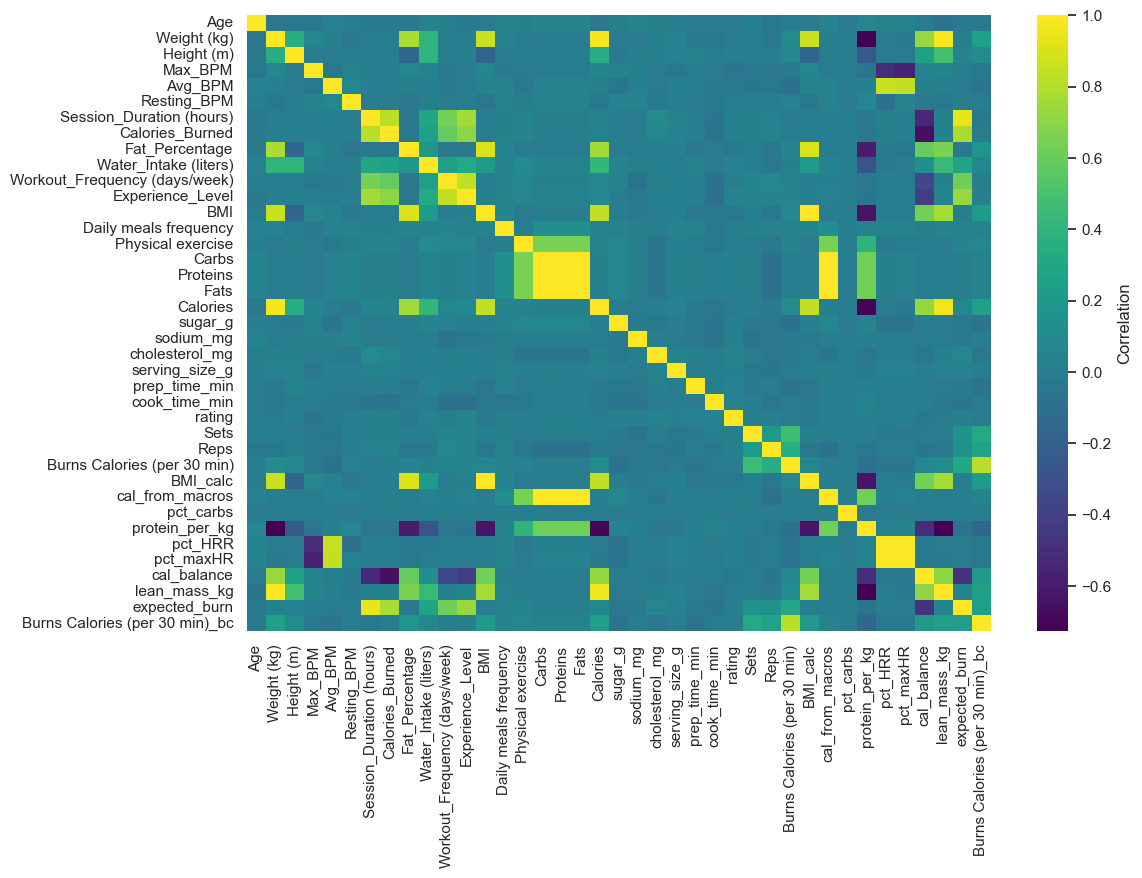

In [65]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data=numeric_df.corr(), cmap='viridis', cbar_kws={'label': 'Correlation'})

## **Analysis**

In [66]:
# Checking skewnewss of the data
numeric_df.skew()

Age                              -0.091603
Weight (kg)                       0.769024
Height (m)                        0.334556
Max_BPM                          -0.034587
Avg_BPM                           0.087885
Resting_BPM                      -0.064834
Session_Duration (hours)          0.020653
Calories_Burned                   0.682426
Fat_Percentage                    0.083993
Water_Intake (liters)             0.057248
Workout_Frequency (days/week)     0.153587
Experience_Level                  0.327854
BMI                               0.789484
Daily meals frequency             0.122040
Physical exercise                 2.422600
Carbs                             0.790432
Proteins                          0.790340
Fats                              0.789789
Calories                          0.653412
sugar_g                           0.027895
sodium_mg                         0.007964
cholesterol_mg                   -0.020933
serving_size_g                   -0.003414
prep_time_m

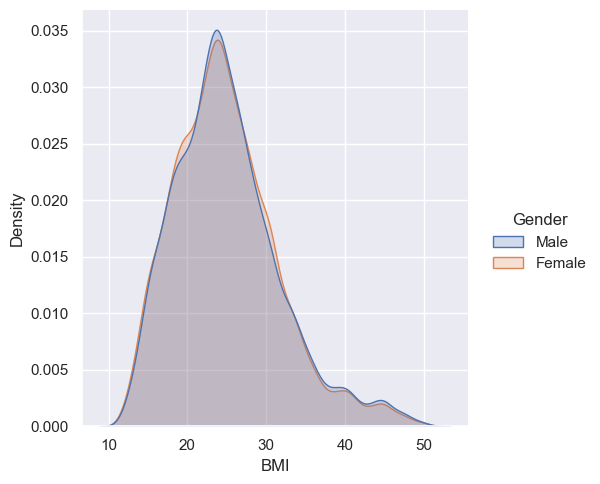

In [67]:
sns.displot(data=df, x='BMI', hue='Gender', kind='kde', fill=True)

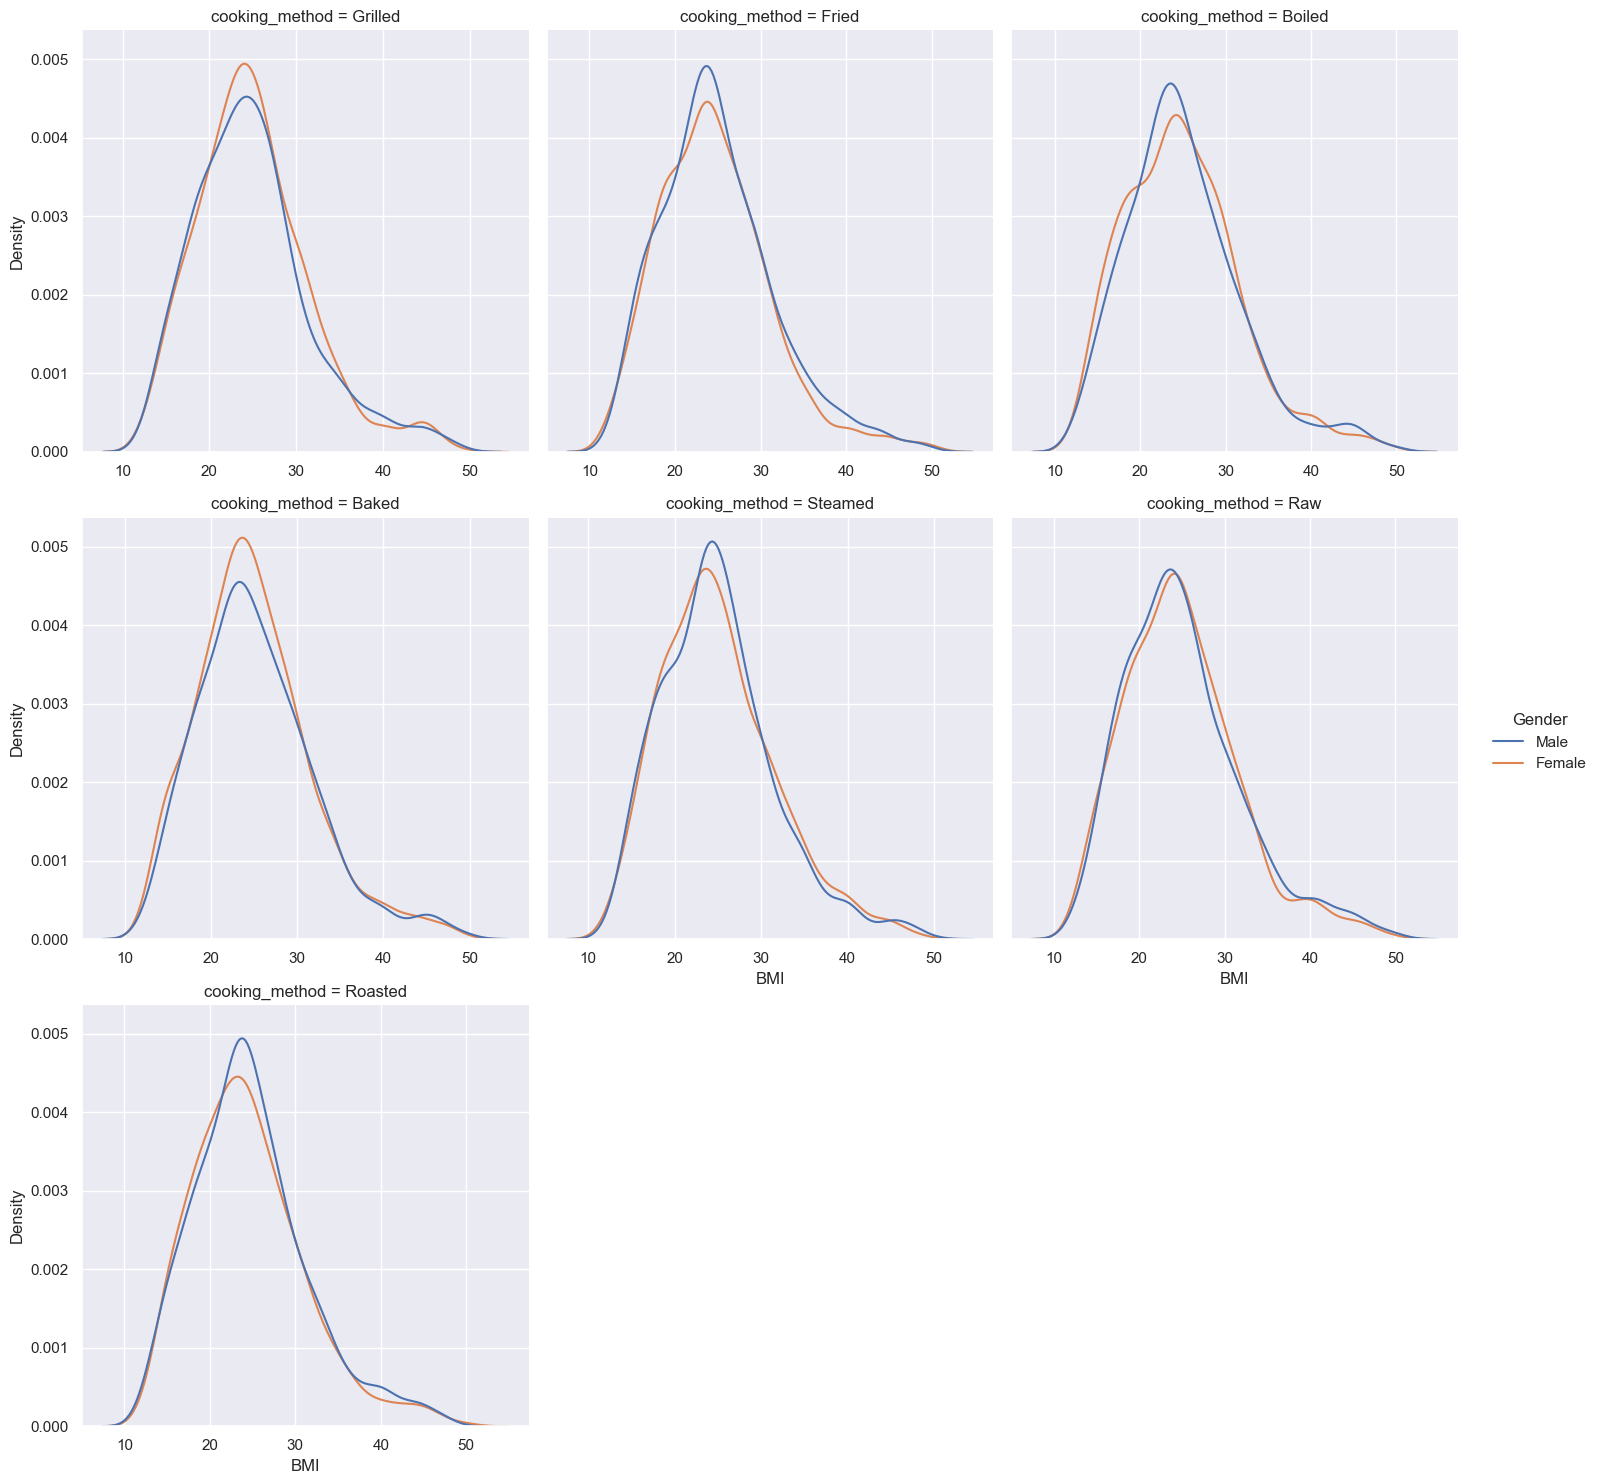

In [68]:
g = sns.displot(data=df, x='BMI', hue='Gender', kind='kde', col='cooking_method', col_wrap=3, facet_kws={'sharex': False})

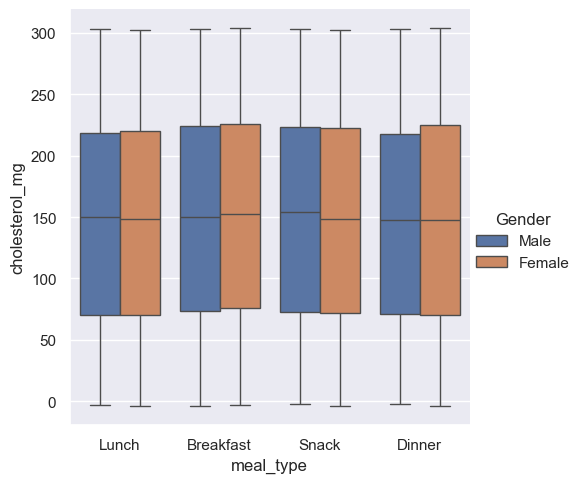

In [69]:
sns.catplot(data=df, x='meal_type', y='cholesterol_mg', hue='Gender', kind='box')

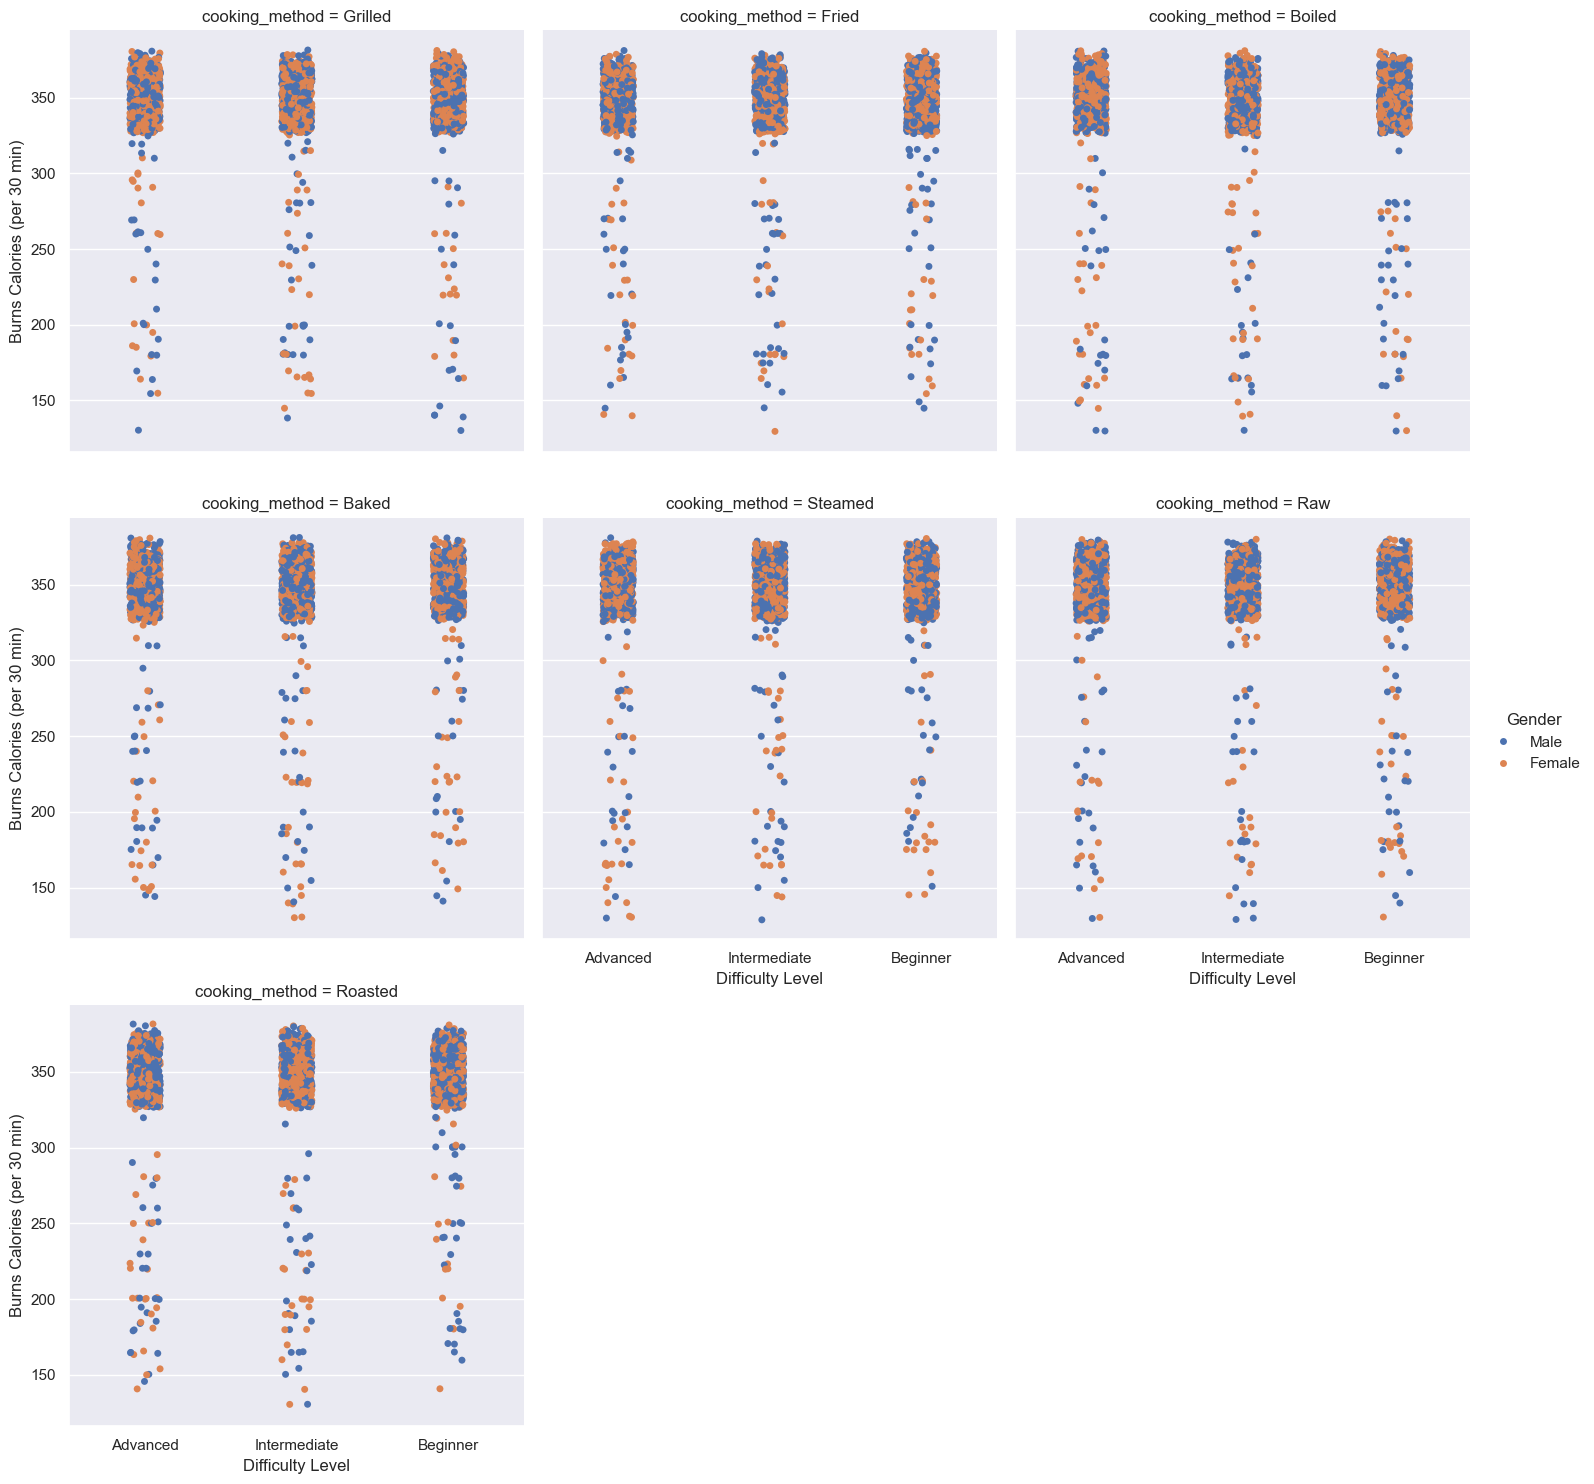

In [70]:
sns.catplot(data=df, x='Difficulty Level', y='Burns Calories (per 30 min)',hue='Gender', col='cooking_method', col_wrap=3)

In [71]:
# Filtering Calorie burns of >350
df_calburn_filtered = df[df['Burns Calories (per 30 min)'] > 350]
df_calburn_filtered['Burns Calories (per 30 min)']

1        357.16
2        359.63
3        351.65
5        374.56
7        363.56
          ...  
19989    365.87
19991    368.82
19993    374.03
19997    352.19
19999    350.46
Name: Burns Calories (per 30 min), Length: 9368, dtype: float64

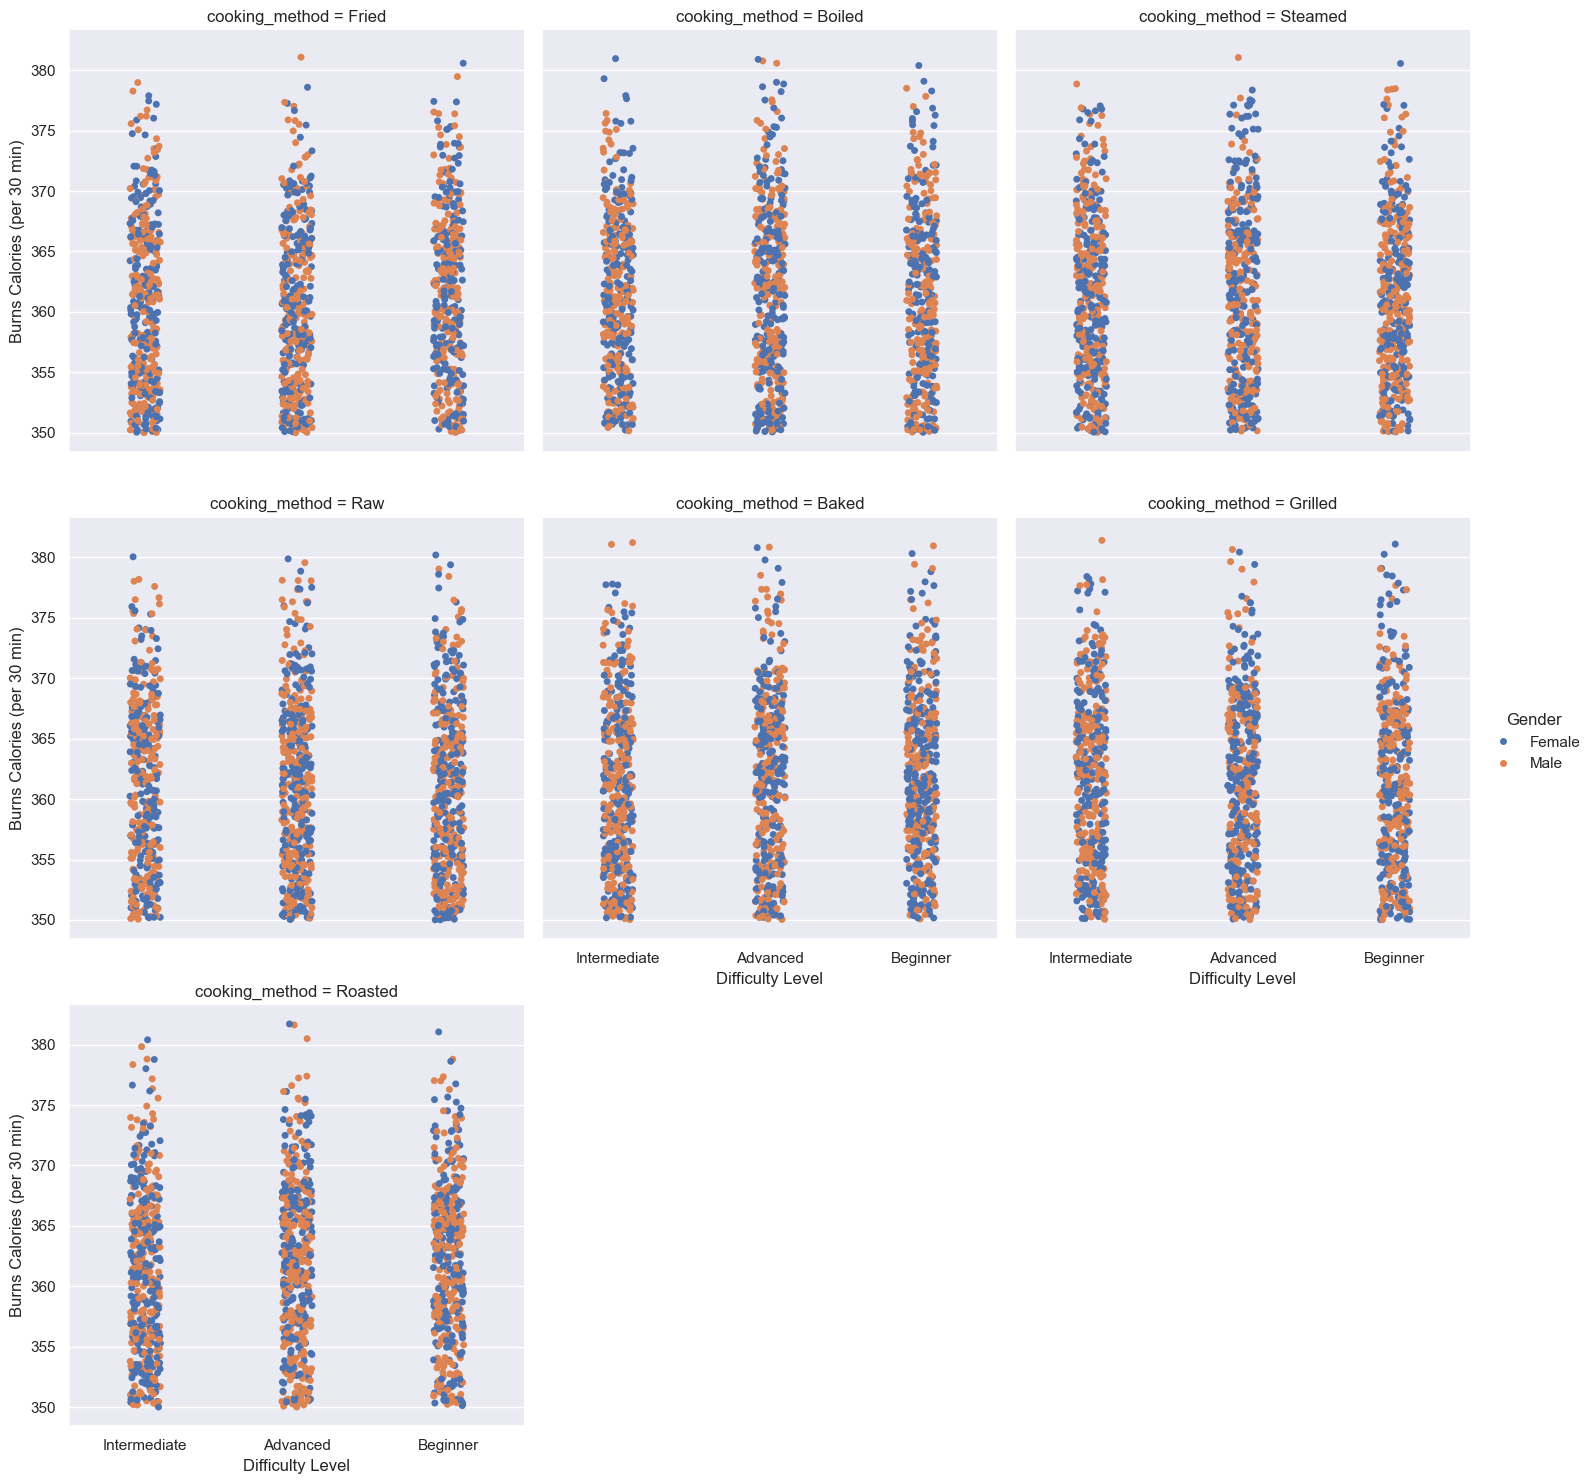

In [72]:
# Looking for Calorie burn of greater than 350
sns.catplot(data=df_calburn_filtered, x='Difficulty Level', y='Burns Calories (per 30 min)',hue='Gender', col='cooking_method', col_wrap=3)

In [73]:
# Rounding off the value of sets
df['Sets'] = np.round(df['Sets'])

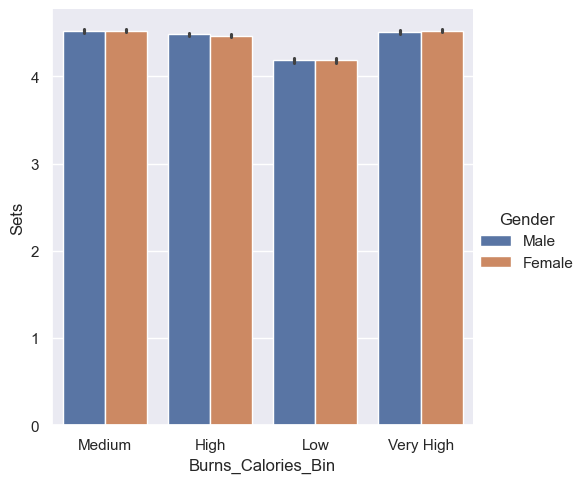

In [74]:
sns.catplot(data=df, x='Burns_Calories_Bin', y='Sets', hue='Gender', kind='bar')

In [75]:
np.unique(df['Workout_Type'])

array(['Cardio', 'HIIT', 'Strength', 'Yoga'], dtype=object)

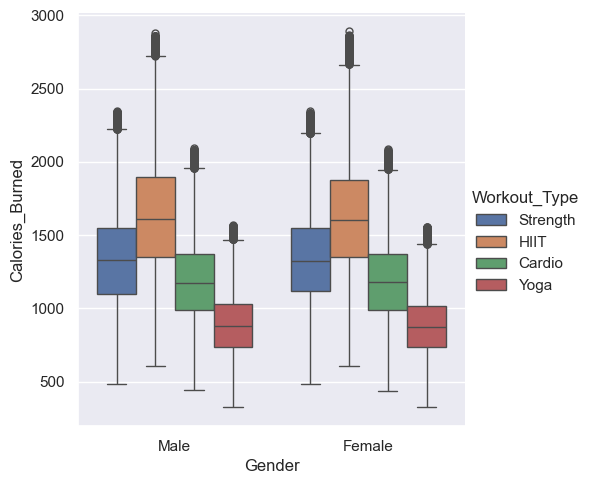

In [76]:
sns.catplot(data=df, x='Gender', y='Calories_Burned', hue='Workout_Type', kind='box')

Removing Calories_Burned Outliers

In [77]:
z_scores = np.abs(stats.zscore(df['Calories_Burned']))
outliers = df[z_scores > 3]  # values more than 3 std deviations away

In [81]:
mean = df['Calories_Burned'].mean()
std = df['Calories_Burned'].std()
outliers = df[(df['Calories_Burned'] < mean - 3*std) | (df['Calories_Burned'] > mean + 3*std)]

In [85]:
Q1 = df['Calories_Burned'].quantile(0.25)
Q3 = df['Calories_Burned'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
outliers = df[(df['Calories_Burned'] < lower_bound) | (df['Calories_Burned'] > upper_bound)]

In [86]:
outliers

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
11,47.77,Female,83.89,1.82,176.36,148.74,69.91,1.91,2733.40,HIIT,...,1848.79,0.500133,1.111813,0.740535,0.843389,-501.40,64.050587,1379.5166,1.116947e+20,Very High
12,19.00,Male,82.66,1.96,173.75,168.71,62.16,1.89,2700.62,HIIT,...,1446.67,0.502727,0.866199,0.954835,0.970993,-131.62,62.715145,1353.0888,1.039329e+20,High
33,41.80,Male,59.72,1.74,194.24,141.17,51.86,1.78,2545.40,HIIT,...,1609.46,0.503448,1.340422,0.627265,0.726781,-804.40,48.106429,1299.2220,1.217206e+20,Very High
39,27.19,Male,88.20,1.98,161.80,152.85,52.99,1.80,2577.96,HIIT,...,2371.53,0.500048,1.340023,0.917747,0.944685,-46.96,69.636483,1211.5800,6.280149e+19,Low
46,21.24,Female,80.78,1.90,193.85,137.76,55.01,1.80,2575.98,HIIT,...,1291.41,0.502923,0.792028,0.596010,0.710653,-401.98,62.449538,1280.4120,9.862441e+19,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19717,20.91,Male,60.14,1.69,179.00,123.24,52.18,1.96,2804.96,HIIT,...,3135.32,0.499751,2.612571,0.560322,0.688492,-983.96,46.880302,1443.2264,1.307767e+20,Very High
19752,20.87,Female,60.32,1.70,178.66,123.09,52.00,1.97,2814.93,HIIT,...,3141.94,0.499195,2.601127,0.561266,0.688962,-928.93,45.123363,1452.5204,1.322055e+20,Very High
19836,31.17,Male,64.67,1.70,160.02,144.03,70.06,1.96,2800.64,HIIT,...,2686.34,0.499937,2.074996,0.822254,0.900075,-895.64,49.028449,1363.6896,8.230420e+19,Medium
19852,40.89,Male,81.70,1.87,167.00,127.72,59.06,1.86,2659.80,HIIT,...,2516.52,0.500167,1.542228,0.636094,0.764790,-373.80,63.529155,1283.8092,7.710153e+19,Medium


In [95]:
# df_clean has no Calories_Burned outliers
df_clean = df[(df['Calories_Burned'] >= lower_bound) & (df['Calories_Burned'] <= upper_bound)]

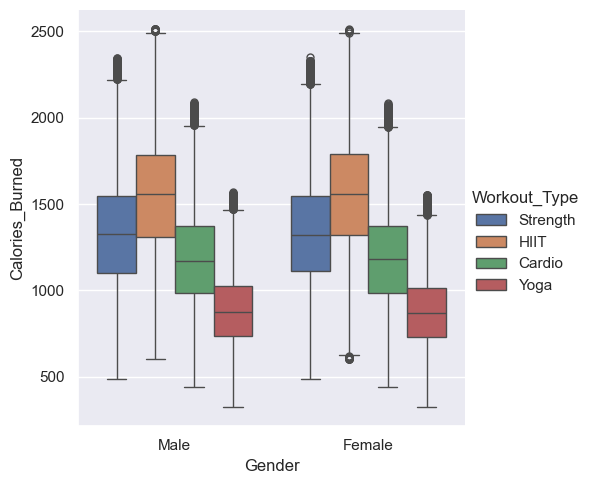

In [96]:
sns.catplot(data=df_clean, x='Gender', y='Calories_Burned', hue='Workout_Type', kind='box')

In [98]:
# Rows removed
print(f'Rows removed: {df.shape[0] - df_clean.shape[0]}')

Rows removed: 507
